<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning-Notes/blob/main/Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation Functions in Deep Learning:

Activation functions introduce non-linearity into the neural network, enabling it to learn complex patterns. Without activation functions, the network would behave like a linear regression model, regardless of its depth.

## Why Activation Functions Are Important

- Allow neural networks to capture non-linear relationships.
- Enable the network to approximate any function (universal approximation).
- Influence the learning process, convergence speed, and model accuracy.

## Common Activation Functions

### 1. Sigmoid

- Formula: `σ(x) = 1 / (1 + e^(-x))`
- Range: (0, 1)
- Pros: Smooth gradient, used in binary classification
- Cons: Vanishing gradient, outputs not zero-centered

### 2. Tanh (Hyperbolic Tangent)

- Formula: `tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))`
- Range: (-1, 1)
- Pros: Zero-centered output, better than sigmoid
- Cons: Still suffers from vanishing gradient

### 3. ReLU (Rectified Linear Unit)

- Formula: `f(x) = max(0, x)`
- Range: [0, ∞)
- Pros: Efficient computation, sparse activation
- Cons: Dying ReLU problem (neurons can become inactive)

### 4. Leaky ReLU

- Formula: `f(x) = x if x > 0 else αx` (typically α = 0.01)
- Range: (-∞, ∞)
- Pros: Solves dying ReLU problem
- Cons: Small gradient for negative inputs

### 5. Softmax

- Formula: `σ(z)_i = e^(z_i) / Σ e^(z_j)` for all j
- Range: (0, 1), sums to 1
- Pros: Converts logits to probabilities, used in multi-class classification
- Cons: Computationally expensive, sensitive to large inputs

## When to Use Which Activation

- **Hidden layers**: ReLU or Leaky ReLU (faster training, less vanishing gradient)
- **Binary classification output**: Sigmoid
- **Multi-class classification output**: Softmax
- **RNNs**: Tanh or ReLU variants depending on the architecture

Choosing the right activation function depends on the specific problem and model architecture. Experimentation is often necessary to find the best performing combination.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y_cat = to_categorical(y)  # One-hot encoding for softmax output if needed

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Function to build and compile a model with a specified activation function
def build_model(activation, output_activation='softmax'):
    model = Sequential()
    model.add(Dense(16, input_dim=2, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(2, activation=output_activation))
    model.compile(optimizer=Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
# Function to visualize decision boundaries
def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolors='k', cmap=plt.cm.Spectral)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

In [9]:
activations = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']
results = {}


Training with activation: sigmoid


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Training with activation: tanh


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Training with activation: relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

Training with activation: elu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

Training with activation: selu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step  


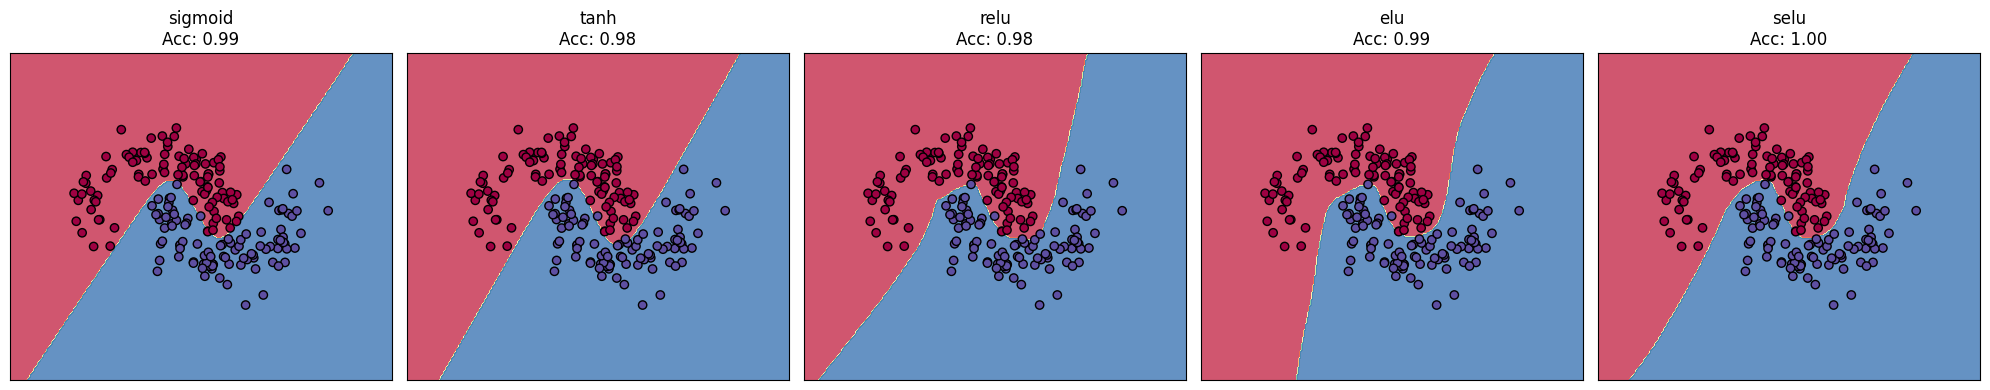

In [11]:
# Create subplots
fig, axes = plt.subplots(1, len(activations), figsize=(20, 4))

# Train, evaluate, and plot
for i, act in enumerate(activations):
    print(f"\nTraining with activation: {act}")

    # Build and train model
    model = build_model(activation=act)
    model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_data=(X_test_scaled, y_test))

    # Evaluate model
    loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
    results[act] = acc

    # Plot decision boundary
    plot_decision_boundary(model, X_test, y_test, axes[i], title=f"{act}\nAcc: {acc:.2f}")

# Show plots
plt.tight_layout()
plt.show()

In [12]:
print("\nTest Accuracy for Different Activation Functions:")
for act, acc in results.items():
    print(f"{act}: {acc:.4f}")


Test Accuracy for Different Activation Functions:
sigmoid: 0.9850
tanh: 0.9800
relu: 0.9750
elu: 0.9900
selu: 0.9950
